# Vera CIJ Data Analyst Skills Assessment
Devin Barkey

March 5, 2021

Programs used: Python

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/Users/devinbarkey/Documents/Job Applications/Vera Data Analyst/Vera Data Analyst Skills Assessment/Copy_of_Dataset_for_Data_Analyst_Skills_Assessment_CIJ.csv"
program_data = pd.read_csv(file_path, nrows = 100)

In [3]:
program_data.head()

,Participant_ID,Participant_First_Name,Participant_Last_Name,Nationality,Gender,Date_Participated_in_Program,Number_of_Referrals
0,447235,Michael,Phelps,United States,M,7/16/18,0.0
1,955356,Larisa,Latynina,Soviet Union,F,5/25/18,NaN
2,134146,Paavo,Nurmi,Finland,M,1/17/18,2.0
3,328398,Mark,Spitz,United States,M,11/29/18,2.0
4,647190,Carl,Lewis,United States,M,1/8/18,3.0


## Question 1: Cleaning the Data

### Handling Missing Values
First, I would determine how we want to handle missing values. Upon examining the data, we see that about 11 entries lack a nationality, 22 lack a gender, and 9 lack a value for the number of referalls. For instance, could the nationality or gender of a program participant be determined from other information? If the number of referalls is not listed, should we assume the value is zero?

In [4]:
program_data.isnull().sum()

Participant_ID                   0
Participant_First_Name           0
Participant_Last_Name            0
Nationality                     11
Gender                          22
Date_Participated_in_Program     0
Number_of_Referrals              9
dtype: int64

### Parsing Dates
Next, I would ensure that the dates are of the proper datetime type so that we can use that column at a later time.

In [5]:
program_data['Date_Participated_in_Program'] = pd.to_datetime(program_data['Date_Participated_in_Program'], format = '%m/%d/%y')
program_data['Date_Participated_in_Program']

0    2018-07-16
1    2018-05-25
2    2018-01-17
3    2018-11-29
4    2018-01-08
        ...    
95   2018-08-21
96   2018-06-09
97   2018-01-12
98   2018-09-15
99   2018-01-14
Name: Date_Participated_in_Program, Length: 100, dtype: datetime64[ns]

### Inconsistent Data Entry
There appear to be three types of data entry inconsistencies. First, some participant IDs contain a unexplained decimal point. This can be remedied through the code below.

In [6]:
program_data.iloc[30,0]

'1047.39'

In [7]:
program_data['Participant_ID'] = program_data['Participant_ID'].str.replace('.', '') 

In [8]:
program_data.iloc[30,0]

'104739'

Second, we have a variety of values for the same nationality, most notably "USA", "US", and "United States" as well as an unknown sequence before some values. To have an accurate count of nationality, we must fix this and transform the various iterations of the United States into a single value. We could also consolidate "Russia" and "Soviet Union" into one marker as well, but for now I'll keep them separated. I would also need guidance on whether to classify "East Germany" as "Germany" or leave it as a separate nationality. 

In [9]:
program_data['Nationality'].unique()

array(['\xa0United States', '\xa0Soviet Union', '\xa0Finland',
       '\xa0Norway', nan, '\xa0Japan', 'USA', 'Czech', 'Hungry',
       '\xa0Belgium', '\xa0Italy', '\xa0Sweden', '\xa0Great Britain',
       '\xa0South Korea', 'Czecoslovakia', '\xa0Hungary', 'U.S.',
       '\xa0Romania', '\xa0Australia', '\xa0Germany', '\xa0France',
       '\xa0United States of America', 'US', '\xa0China', '\xa0Russia',
       '\xa0East Germany', '\xa0Switzerland', '\xa0Netherlands'],
      dtype=object)

In [10]:
program_data['Nationality'] = program_data['Nationality'].str.strip('\xa0')
program_data['Nationality'].unique()

array(['United States', 'Soviet Union', 'Finland', 'Norway', nan, 'Japan',
       'USA', 'Czech', 'Hungry', 'Belgium', 'Italy', 'Sweden',
       'Great Britain', 'South Korea', 'Czecoslovakia', 'Hungary', 'U.S.',
       'Romania', 'Australia', 'Germany', 'France',
       'United States of America', 'US', 'China', 'Russia',
       'East Germany', 'Switzerland', 'Netherlands'], dtype=object)

In [11]:
us = ['USA', 'U.S.', 'United States of America', 'US']
rows_to_replace = program_data['Nationality'].isin(us)
program_data.loc[rows_to_replace, 'Nationality'] = "United States"
program_data['Nationality'].unique()

array(['United States', 'Soviet Union', 'Finland', 'Norway', nan, 'Japan',
       'Czech', 'Hungry', 'Belgium', 'Italy', 'Sweden', 'Great Britain',
       'South Korea', 'Czecoslovakia', 'Hungary', 'Romania', 'Australia',
       'Germany', 'France', 'China', 'Russia', 'East Germany',
       'Switzerland', 'Netherlands'], dtype=object)

Third, we note from a just a scan of the data that there are duplicate entries. For instance, Michael Phelps appears several times. Thanklfully, `pandas` has just the function for this.

In [12]:
program_data.loc[program_data['Participant_Last_Name'] == 'Phelps']

,Participant_ID,Participant_First_Name,Participant_Last_Name,Nationality,Gender,Date_Participated_in_Program,Number_of_Referrals
0,447235,Michael,Phelps,United States,M,2018-07-16,0.0
17,447235,Michael,Phelps,United States,M,2018-07-16,0.0
18,447235,Michael,Phelps,United States,M,2018-07-16,0.0
19,447235,Michael,Phelps,United States,M,2018-07-16,0.0


In [13]:
program_data.drop_duplicates(inplace = True)

## Question 2

We can get the number of participants by looking at the `shape` parameter of `program_data`.

In [14]:
program_data.shape[0]

95

## Question 3

We can find the most frequent nationalities using the `value_counts` function and then looking at the top 5 entries using `head()`.

In [15]:
nationalities = program_data['Nationality'].value_counts().head()
nationalities

United States    26
Soviet Union      9
Norway            8
Japan             5
Great Britain     4
Name: Nationality, dtype: int64

Text(0.5, 0, 'Nationality')

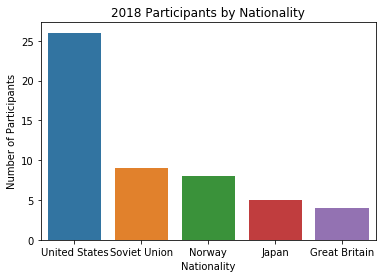

In [16]:
plt.figure()
plt.title("2018 Participants by Nationality")
sns.barplot(x = nationalities.index, y = nationalities)
plt.ylabel("Number of Participants")
plt.xlabel("Nationality")

## Question 4

a) From below, we see that on average a participant made 3 referrals.

In [17]:
program_data['Number_of_Referrals'].describe()

count    86.000000
mean      2.965116
std       8.180965
min       0.000000
25%       0.000000
50%       1.000000
75%       4.000000
max      61.000000
Name: Number_of_Referrals, dtype: float64

b) From above and the boxplot below, we can see that most participants made up to 5 or so referrals while two participants made a large number of referrals.

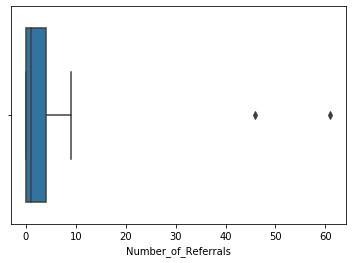

In [18]:
sns.boxplot(program_data['Number_of_Referrals'])

c) From below, at least 43 participants made at least one referral.

In [19]:
program_data.loc[program_data['Number_of_Referrals'] > 0].shape[0]

43

## Question 5

a) Before merging the two datasets, I would perform many of the cleaning procedures outlined in my response to Question 1. In particular, I would ensure that the `Participant_ID` columns for both datasets had the same format and did not contain any entry errors.

b) In Python, one could merge these two datasets using `pandas`'s `join` or `merge` functions  to perform an inner join using the `Participant_ID` for the `on` parameter. For instance, it could be done as follows:
```
merged_data = administrative_data.join(program_data, on = 'Participant_ID')
```
or
```
merged_data = administrative_data.merge(program_data, on = 'Participant_ID')
```

c) One important data quality check I would perform is to ensure that the number of entries in the merged dataset is the same as that in the administrative dataset. If every entry in the program data is be matched with an entry on the administrative data, the join should not result in any new entries. After doing this check, I would clean the data by eliminating duplicate columns where possible.